In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from engineering_notation import *
from BBO import *

Wycinek z "Interference with correlated photons: Five quantum mechanics experiments for  undergraduates" Galvez et al. 2005:\
(Odwołanie [34] to K. Kato et al. 1986)\
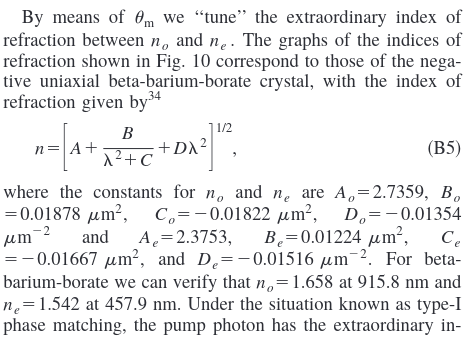

K. Kato et al. 1986:\
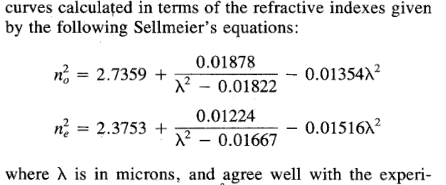

Według nich $n_e(457.9\text{~nm})=1.542$, ale jak wstawiłem do wzoru to wyszło mi 1.561 - dlaczego!?

In [ ]:
L = np.linspace(0.23, 1)
plt.plot(
    L,
    [no(l, "Kato") for l in L],
    "s",
    label="K. Kato et al. 1986 $n_o$",
)

L = np.linspace(0.23, 1, num=80)
plt.plot(
    L,
    [no(l, "Eimerl") for l in L],
    "*",
    label="Eimerl et al. 1987 $n_o$",
)

L = np.linspace(0.189, 5, num=100)
plt.plot(
    L,
    [no(l, "Tamosaukas") for l in L],
    "o",
    label="Tamosauskas et al. 2019 $n_o$",
)

L = np.linspace(0.65, 3, num=100)
plt.plot(
    L,
    [no(l, "Zhang") for l in L],
    "^",
    label="Zhang et al. 2000 $n_o$",
)

plt.plot([0.9158], [1.658], "x", color="black", label="Point from Galvez et al. 2005")

plt.xlim(0.2, 1)
plt.ylim(1.60, 1.9)
plt.xlabel("Wavelength $\lambda$ [$\mu$m]")
plt.ylabel("Ordinary refractive index $n_o$")
plt.legend()

In [ ]:
L = np.linspace(0.22, 1)
plt.plot(
    L,
    [ne(l, "Kato") for l in L],
    "s",
    label="K. Kato et al. 1986 $n_e$",
)

L = np.linspace(0.22, 1.06, num=100)
plt.plot(
    L,
    [ne(l, "Eimerl") for l in L],
    "*",
    label="Eimerl et al. 1987 $n_e$",
)

L = np.linspace(0.188, 5.2, num=100)
plt.plot(
    L,
    [ne(l, "Tamosaukas") for l in L],
    "o",
    label="Tamosauskas et al. 2019 $n_e$",
)

L = np.linspace(0.64, 3.18, num=100)
plt.plot(
    L,
    [ne(l, "Zhang") for l in L],
    "^",
    label="Zhang et al. 2000 $n_e$",
)

plt.plot([0.4579], [1.542], "kx", label="Mismatch from Galvez et al. 2005")

plt.xlim(0.2, 1)
# plt.ylim(1.60, 1.9)
plt.xlabel("Wavelength $\lambda$ [$\mu$m]")
plt.ylabel("Extraordinary refractive index $n_e$")
plt.legend()

In [ ]:
[np.sqrt(2.3753 + 0.01224 / (l**2 - 0.01667) + -0.01516 * l**2) for l in [0.4579]]

In [ ]:
DEG_TO_RAD = np.pi / 180

l_pump = 0.49
l_is = 0.98  # idle and signal


def equations(vars):
    a, b, gp = vars
    # wartości wektorów falowych w krysztale
    kp = 2 * np.pi / l_pump * neff(l_pump, gp + 28 * DEG_TO_RAD)
    ki = 2 * np.pi / l_is * no(l_is)
    ks = 2 * np.pi / l_is * neff(l_is, gp + a + 28 * DEG_TO_RAD)

    # zmienne uwikłane
    ap = np.arcsin(no(l_is) * np.sin(a + gp))
    bp = 17 * DEG_TO_RAD - ap
    g = np.arcsin(neff(l_pump, gp + 28 * DEG_TO_RAD) * np.sin(gp))

    # równania
    F = np.sin(a + gp) * no(l_is) - np.sin(bp)
    G = np.sin(a) * ks - np.sin(b) * ki
    H = np.sin(b) * kp - np.sin(180 * DEG_TO_RAD - a - b) * ks
    return [F, G, H]


initial_guess = [0, 0, 0]
solution = fsolve(equations, initial_guess)
print(solution)  # [x, y]

g = np.arcsin(neff(0.49, solution[2] + 28 * DEG_TO_RAD) * np.sin(solution[2]))
print(g / DEG_TO_RAD)